## Predicting User Churn
##### A decision tree model will be used to predict the type of users that stop using the company's services.

In [286]:
import sys
sys.executable

'/usr/bin/python'

###### Importing relevant modules

In [227]:
import pandas as pd
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from sklearn.preprocessing import LabelEncoder
import plotly.graph_objs as go
import plotly.offline as py
py.init_notebook_mode(connected=True)
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

###### Reading in the csv file into a dataframe

In [228]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [229]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


###### Yes and No will be replaced with 1 and 0 so that we can visualise all the variables

In [230]:
for i in df:
    df[i] = df[i].replace('Yes',1).replace('No',0)

In [231]:
x = df.iloc[:,0:20]
y = df.iloc[:,-1]

In [232]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=101)

In [233]:
x_train.set_index('customerID',inplace=True)

In [234]:
x_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
customerID,,,,,,,,,,,,,,,,,,,
7301-ABVAD,Female,0,0,0,72,1,1,DSL,0,1,1,1,1,1,Two year,0,Bank transfer (automatic),86.60,6350.5
6007-TCTST,Female,0,1,1,72,1,1,Fiber optic,1,1,1,1,1,1,Two year,1,Bank transfer (automatic),115.80,8476.5
1163-ONYEY,Male,0,1,1,41,1,1,DSL,1,1,1,0,1,0,Month-to-month,1,Credit card (automatic),74.55,3023.55
8208-EUMTE,Male,0,0,0,16,0,No phone service,DSL,1,1,1,1,1,0,Two year,0,Mailed check,54.85,916.15
6348-SNFUS,Male,0,1,1,72,0,No phone service,DSL,1,1,1,1,0,1,Two year,1,Credit card (automatic),55.45,4179.2


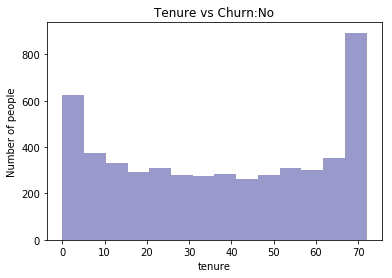

In [256]:
ax0 = sns.distplot(df[df['Churn'] == 0]['tenure'].dropna(), color= 'navy', label= 'Churn: No',kde=False)
plt.title('Tenure vs Churn:No')
plt.ylabel('Number of people')
plt.show()

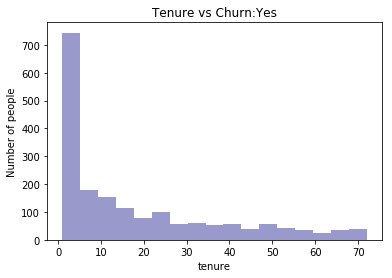

In [257]:
ax1 = sns.distplot(df[df['Churn'] == 1]['tenure'].dropna(), color= 'navy', label= 'Churn: Yes',kde=False)
plt.title('Tenure vs Churn:Yes')
plt.ylabel('Number of people')
plt.show()

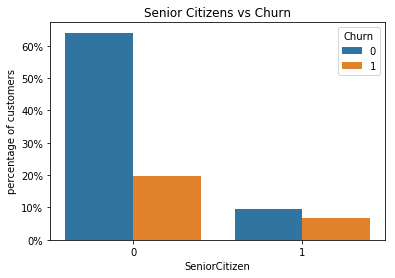

In [259]:
def barplot_percentages(feature, orient='v', axis_name="percentage of customers"):
    ratios = pd.DataFrame()
    g = df.groupby(feature)["Churn"].value_counts().to_frame()
    g = g.rename({"Churn": axis_name}, axis=1).reset_index()
    g[axis_name] = g[axis_name]/len(df)
    if orient == 'v':
        ax = sns.barplot(x=feature, y= axis_name, hue='Churn', data=g, orient=orient)
        ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])
        plt.title('Senior Citizens vs Churn')
    else:
        ax = sns.barplot(x= axis_name, y=feature, hue='Churn', data=g, orient=orient)
        ax.set_xticklabels(['{:,.0%}'.format(x) for x in ax.get_xticks()])
    ax.plot()
barplot_percentages("SeniorCitizen")

###### From the above plot we can see that senior citizens are less likely to churn but we can also see that there are significantly less senior citizens than non-senior citizens

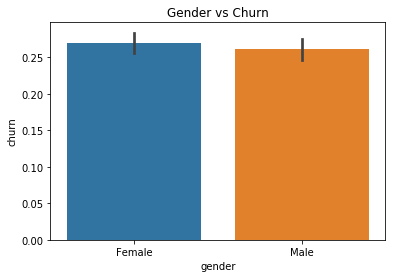

In [264]:
df['churn'] = df['Churn'].replace('No',0).replace('Yes',1)
sns.barplot(x='gender',y='churn',data=df,order=['Female','Male'])
plt.title('Gender vs Churn')
plt.show()

###### The gender vs churn plot shows that there is no significance in the gender of customers that churn.

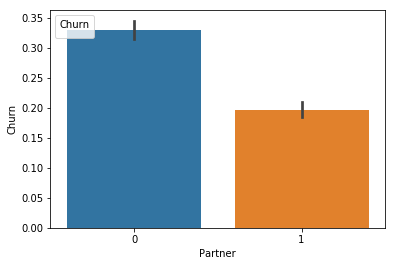

In [239]:
ax = sns.barplot(x='Partner',y='Churn',data=df)
labels =['No','Yes']
ax.set_label('No' 'Yes')
h,l = ax.get_legend_handles_labels()
ax.legend(h,labels,title='Churn',loc='upper left')

###### The above plot shows that customers without partners are more likely to churn than customers without.

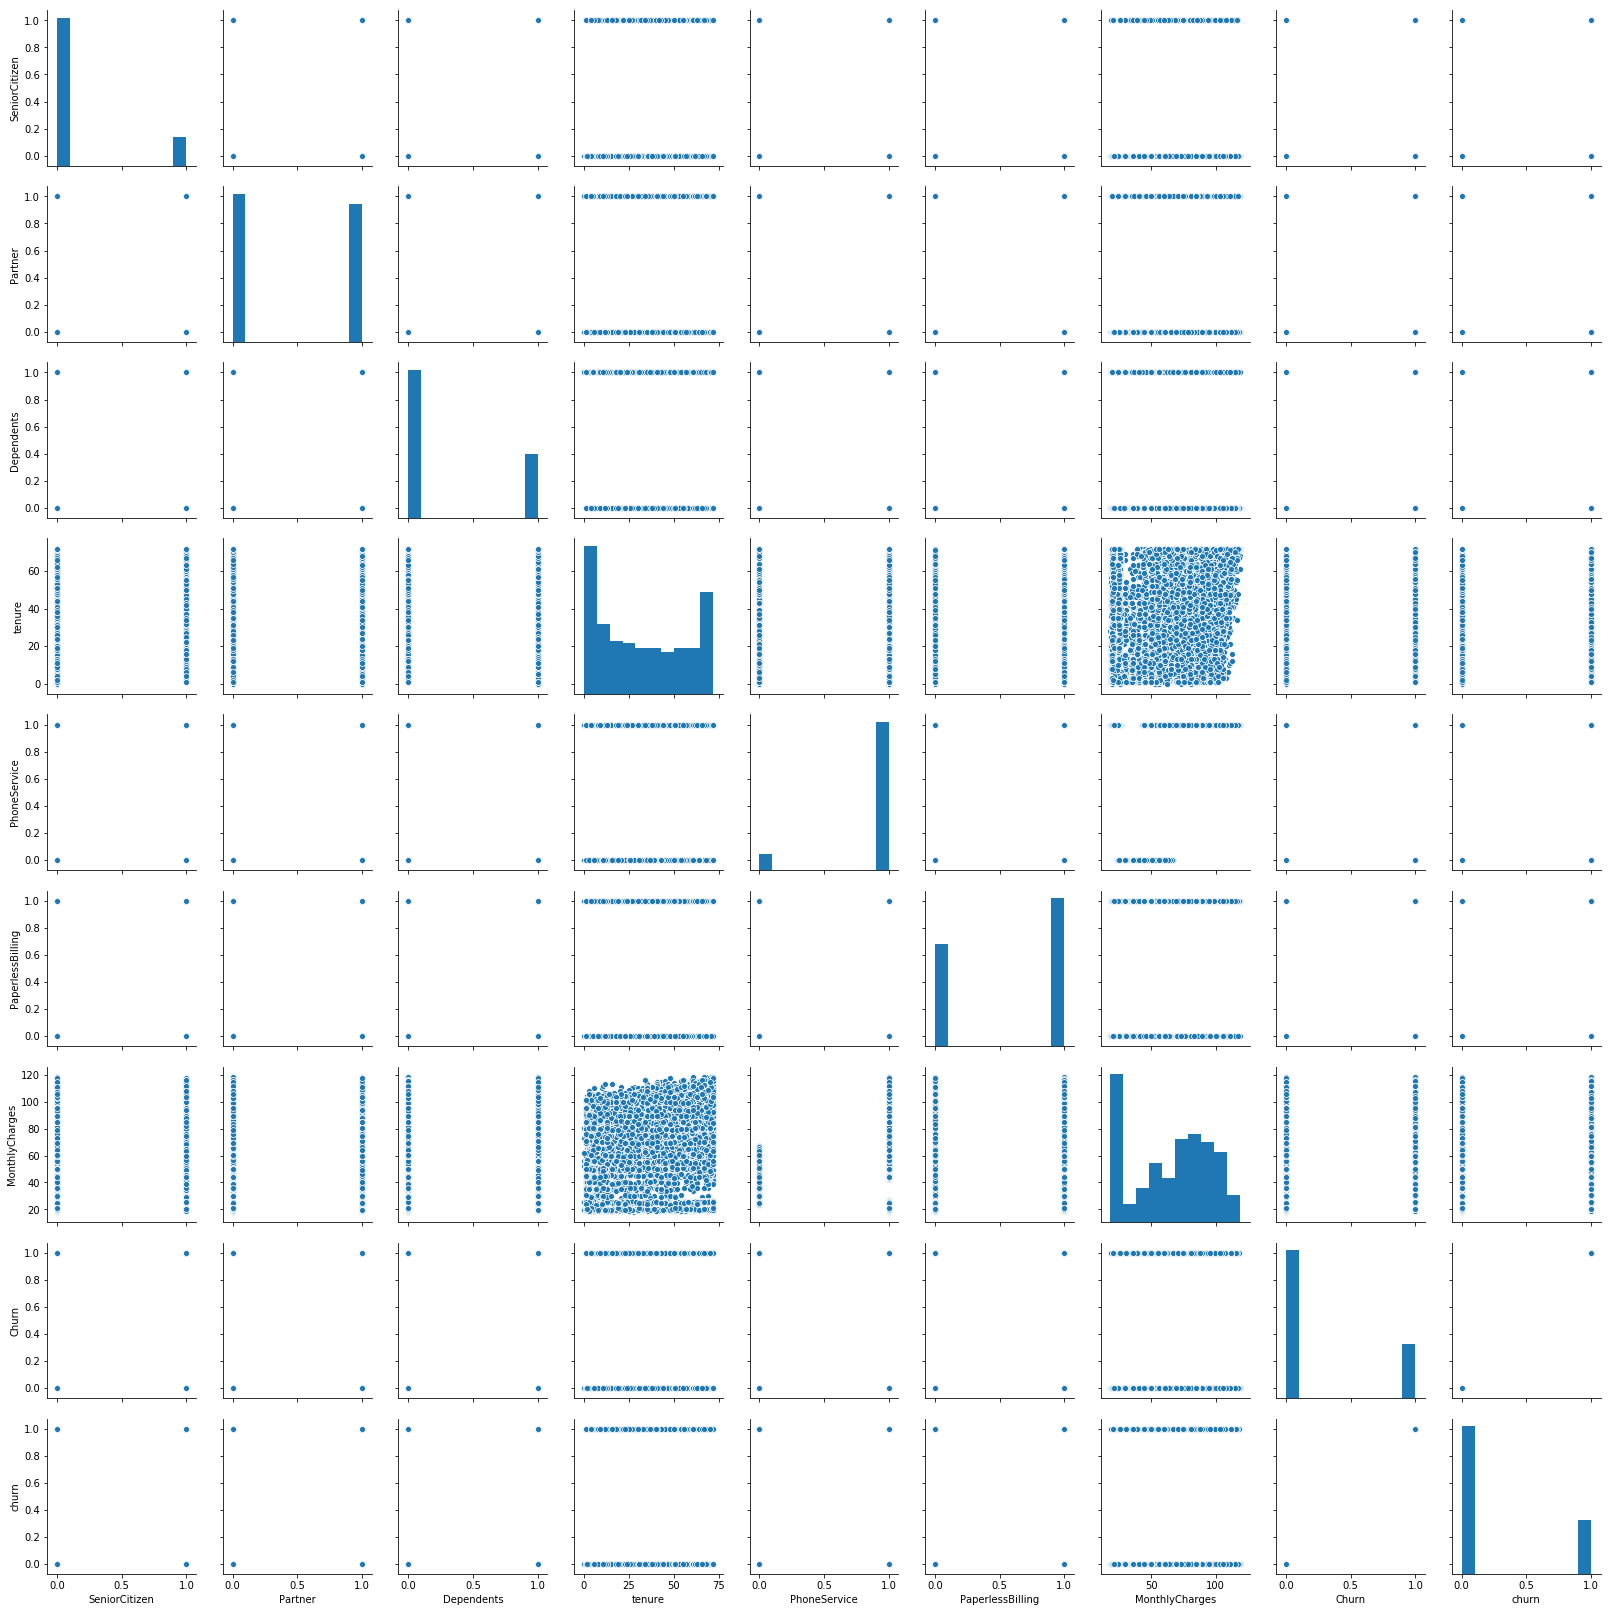

In [240]:
sns.pairplot(df)

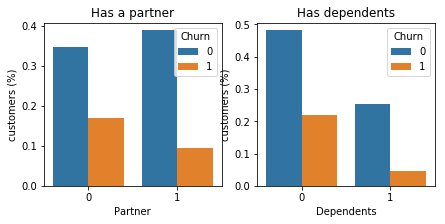

In [241]:
fig, axis = plt.subplots(1, 2, figsize=(7,3))

axis[0].set_title("Has a partner")
axis[1].set_title("Has dependents")
axis_y = "customers (%)"
# Plot Partner column
partner = df.groupby('Partner')["Churn"].value_counts()/len(df)
partner = partner.to_frame().rename({"Churn": axis_y}, axis=1).reset_index()
ax = sns.barplot(x='Partner', y= axis_y, hue='Churn', data=partner, ax=axis[0])
# Plot Dependents column
dependent = df.groupby('Dependents')["Churn"].value_counts()/len(df)
dependent = dependent.to_frame().rename({"Churn": axis_y}, axis=1).reset_index()
ax = sns.barplot(x='Dependents', y= axis_y, hue='Churn', data=dependent, ax=axis[1])

Text(0.5,1,'Churn')

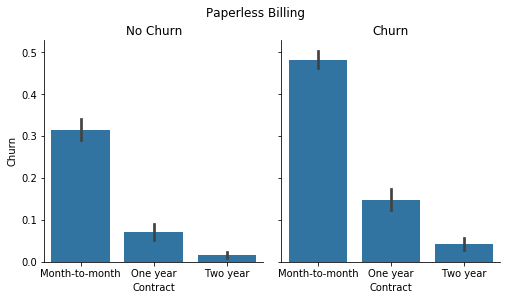

In [242]:
g = sns.FacetGrid(df, col="PaperlessBilling", height=4, aspect=.9)
fig = g.map(sns.barplot, "Contract", "Churn",order= ['Month-to-month', 'One year', 'Two year'])
g.fig.suptitle('Paperless Billing',y=1.03)
ax1 = g.fig.axes[0]
ax1.set_title('No Churn')
ax2 = g.fig.axes[1]
ax2.set_title('Churn')

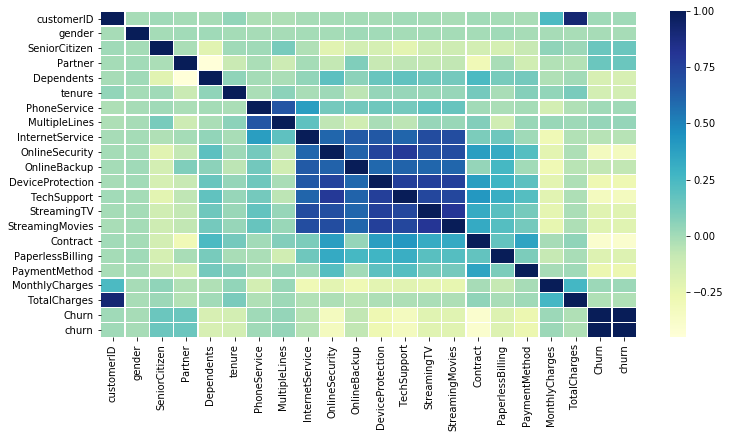

In [243]:
plt.figure(figsize=(12, 6))
corr = df.apply(lambda x: pd.factorize(x)[0]).corr()
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
                 linewidths=.2, cmap="YlGnBu")

In [244]:
df.corr()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,Churn,churn
SeniorCitizen,1.000000,0.016479,-0.211185,0.016567,0.008576,0.156530,0.220173,0.150889,0.150889
Partner,0.016479,1.000000,0.452676,0.379697,0.017706,-0.014877,0.096848,-0.150448,-0.150448
Dependents,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.111377,-0.113890,-0.164221,-0.164221
tenure,0.016567,0.379697,0.159712,1.000000,0.008448,0.006152,0.247900,-0.352229,-0.352229
PhoneService,0.008576,0.017706,-0.001762,0.008448,1.000000,0.016505,0.247398,0.011942,0.011942
PaperlessBilling,0.156530,-0.014877,-0.111377,0.006152,0.016505,1.000000,0.352150,0.191825,0.191825
MonthlyCharges,0.220173,0.096848,-0.113890,0.247900,0.247398,0.352150,1.000000,0.193356,0.193356
Churn,0.150889,-0.150448,-0.164221,-0.352229,0.011942,0.191825,0.193356,1.000000,1.000000
churn,0.150889,-0.150448,-0.164221,-0.352229,0.011942,0.191825,0.193356,1.000000,1.000000


###### MonthlyCharges, PaperlessBilling, Contract and PhoneService will be used for modelling because they have the highest correlations to churn. However, the actual correlations are very low

In [245]:
le = LabelEncoder()
def pie_plot(Column):    
    ct1 = pd.crosstab(df[Column],df['Churn'])
    trace1 = go.Pie(labels = ct1.index,
                    values = ct1.iloc[:,0],
                    
                
                    domain=dict(x=[0,.45]))
    trace2 = go.Pie(labels = ct1.index,
                    values = ct1.iloc[:,1],
                    domain=dict(x=[.55,1])
                   )

    layout = go.Layout(dict(title = Column + " distribution in customer churn ",
                                plot_bgcolor  = "rgb(243,243,243)",
                                paper_bgcolor = "rgb(243,243,243)",
                                annotations = [dict(text = "churn customers",
                                                    font = dict(size = 13),
                                                    showarrow = False,
                                                    x = .15, y = 1),
                                               dict(text = "Non-churn customers",
                                                    font = dict(size = 13),
                                                    showarrow = False,
                                                    x = .88,y = 1)

                                              ]
                               )
                          )

    fig = go.Figure(data=[trace1,trace2],layout=layout)
    py.iplot(fig)
all_cat_var = df.nunique()[df.nunique()<5].keys().tolist()

cat_var = all_cat_var[:-1]
for i in cat_var:
    pie_plot(i)

###### Creating dummy variables

In [265]:
dummy = ['PhoneService','Contract','PaperlessBilling','MonthlyCharges']
df_dummy = pd.get_dummies(data,prefix_sep='_',columns=dummy)
df_dummy.drop(['PhoneService_0','Contract_0','PaperlessBilling_0','churn'],axis=1,inplace=True)

In [266]:
col = [i for i in df_dummy.columns if ((i != 'Churn') and (i != 'customerID'))]
X = df_dummy[col]
y = df_dummy['Churn']

###### Splitting the dataset using a 70/30 split

In [248]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

###### Creating the model

In [250]:
dt = DecisionTreeRegressor(random_state=5)
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)

In [251]:
y_pred = y_pred.astype(int)

In [252]:
accuracy_score(y_test,y_pred)

0.7321344060577378

In [253]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.82      0.82      1539
           1       0.51      0.49      0.50       574

   micro avg       0.73      0.73      0.73      2113
   macro avg       0.66      0.66      0.66      2113
weighted avg       0.73      0.73      0.73      2113



In [267]:
print(confusion_matrix(y_test,y_pred))

[[1263  276]
 [ 290  284]]


In [254]:
auc_score = roc_auc_score(y_test, y_pred)
auc_score

0.657718143597476